<a href="https://www.kaggle.com/code/manarahs/preprocessing-2-main?scriptVersionId=120296514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import os
import dlib

In [2]:
train_data= "/kaggle/input/autism-image-data/AutismDataset/train"
train_img = ["../input/autism-image-data/AutismDataset/train/{}".format(i) for i in os.listdir(train_data)]

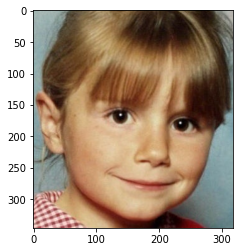

In [3]:
sample2=[]
def sampledata():
    for i in train_img[0:1]:
        img=cv2.imread(i)
        sample=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgplot = plt.imshow(sample)
        plt.show()
        sample2.append(sample)
    return sample2
sample_data=sampledata()


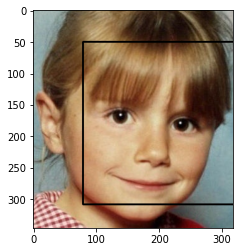

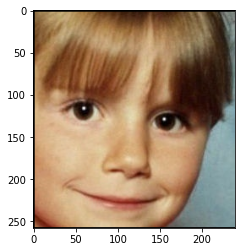

In [4]:
detected=[]
def cropping_based_face_detection(samdata):
    
    detector = dlib.get_frontal_face_detector()
    greyimg=cv2.cvtColor(samdata, cv2.COLOR_BGR2GRAY)
    detectedimg = detector(greyimg)
    #print("found {} face(s)".format(len(detectedimg)))
    
    for face in detectedimg:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()
        
        img=cv2.rectangle(samdata, (x1, y1), (x2, y2), (0, 0, 0), 2)
        img_height, img_width, c = img.shape
        imgplot = plt.imshow(img)
        plt.show()
        cropped = img[max(0, face.top()): min(face.bottom(), img_height),max(0, face.left()): min(face.right(), img_width)]
        imgplot = plt.imshow(cropped)
        plt.show()
        detected.append(cropped)
        
    return detected

for i in sample_data:
    det_img=cropping_based_face_detection(i)
    
    

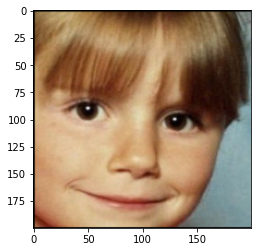

In [5]:
resizedimg=[]
def ReSize(detimg):
    img=cv2.resize(detimg,(200,200))
    imgplot = plt.imshow(img)
    plt.show()
    resizedimg.append(img)
    return resizedimg

for i in det_img:
    res_img=ReSize(i)
    

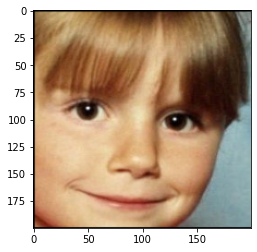

In [6]:
norm=[]
def normalize(resimg):
    img=cv2.cvtColor(resimg,cv2.COLOR_BGR2RGB)
    img_normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img1=cv2.cvtColor(img_normalized,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(img1)
    plt.show()
    norm.append(img1)
    return norm

for i in res_img:
    norm_img=normalize(i)    

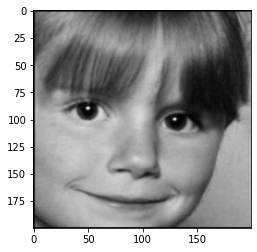

In [7]:
grey=[]
def gray(normimg):
    img=cv2.cvtColor(normimg, cv2.COLOR_BGR2GRAY)
    I=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(I)
    plt.show()
    grey.append(I)
    return grey

for i in norm_img:
    grey_img=gray(i)   
    

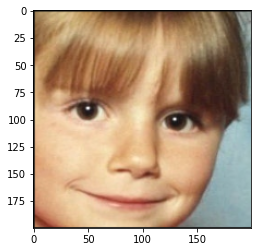

In [8]:
bc=[]
def Brightnessandcontrast(normimg):
    Bright = 20
    Contrast = 1
    img=cv2.cvtColor(normimg,cv2.COLOR_BGR2RGB)
    adjusted = cv2.convertScaleAbs(img, alpha=Contrast, beta=Bright)
    rgbadjusted=cv2.cvtColor(adjusted,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbadjusted)
    plt.show()
    bc.append(rgbadjusted)
    return bc

for i in res_img:
    b_c=Brightnessandcontrast(i)

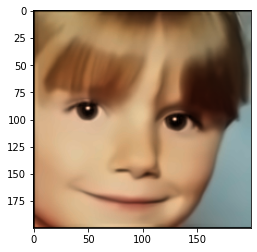

In [9]:
blurred=[]
def mean_noise_reduction(normimg):
    img=cv2.cvtColor(normimg,cv2.COLOR_BGR2RGB)
    filteredimg = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbfilteredimg)
    plt.show()
    blurred.append(rgbfilteredimg)
    return blurred

for i in res_img:
    blur_img=mean_noise_reduction(i)
    
    

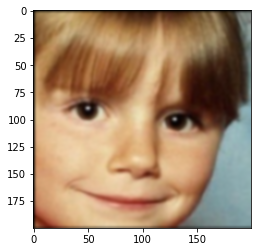

In [10]:
blur=[]
def three_noise_reduction(normimg):
    img=cv2.cvtColor(normimg,cv2.COLOR_BGR2RGB)
    filteredimg =cv2.GaussianBlur(img,(5,5),0)
    #filteredimg=cv2.blur(img,(5,5))
    #filteredimg=cv2.medianBlur(img,5)
    rgbfilteredimg=cv2.cvtColor(filteredimg,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(rgbfilteredimg)
    plt.show()
    blur.append(rgbfilteredimg)
    return blur

for i in norm_img:
    blur_img=three_noise_reduction(i)